<a href="https://colab.research.google.com/github/pramod1997/Deep_Learning_Assignments/blob/master/DL_Assgn_1_Ques_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# drive already mounted
from google.colab import drive
drive.mount('drive',force_remount= False)


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
#75% for training and 25% for training
# for this question we need to design shallow CNN 
# first we use keras CNN layers to do so and then do classification


In [0]:
# problem -> image classification 
# no of classes = 7 
# train test split  - 0.75 


In [66]:

## moving the dataset folders to repsective location

import os

k1 = next(os.walk('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/1'))[2]

k2 = next(os.walk('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/2'))[2]

k3 = next(os.walk('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/3'))[2]

k4 = next(os.walk('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/4'))[2]

k5 = next(os.walk('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/5'))[2]

k6 = next(os.walk('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/6'))[2]

k7 = next(os.walk('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/7'))[2]

len(k1),len(k2),len(k3),len(k4),len(k5),len(k6),len(k7)

(86, 116, 154, 172, 142, 122, 119)

In [0]:
import matplotlib.pyplot as plt

In [0]:
image = plt.imread('/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification/1/action0001.jpg')

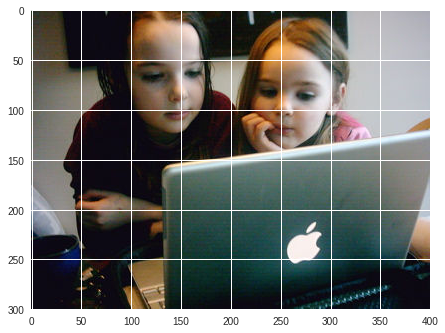

In [69]:
plt.imshow(image)

In [70]:
image.shape  #### every image is of same dimension 

(300, 400, 3)

In [0]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D , Flatten, Activation , MaxPooling2D , BatchNormalization, Dense

In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=(300,400,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Conv2D(16,kernel_size=(2,2),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(7,activation = 'relu'))




In [0]:
model.compile(optimizer='adam',
             metrics=['accuracy'],
             loss='categorical_crossentropy')


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 300, 400, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 300, 400, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 300, 400, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 150, 200, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 200, 32)      9248      
_________________________________________________________________
activation_8 (Activation)    (None, 150, 200, 32)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 150, 200, 32)      128       
__________

In [0]:
# since the data is not that much using fit first 
# after augmetantaion and others 

In [76]:
pip install split-folders #to create train and valid and test folders from the same 

In [0]:
input_des = '/content/drive/My Drive/DL_2019/Assignment-1_Datasets /A1-Q2_Dataset/HumanActionClassification'
output_des = '/content'



In [0]:
import split_folders
split_folders.ratio(input_des,output=output_des,seed=1337,ratio=(0.65,0.1,0.25))

In [79]:
!ls /content/test   ### so we have labels even for test so that we can classify that
### approch we can use a csv file with labels on it.

1  2  3  4  5  6  7


In [80]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(300, 400),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/val',
        target_size=(300, 400),
        batch_size=32,
        class_mode='categorical')

model.fit_generator(
        train_generator,
        steps_per_epoch=int(589/32),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=1)

Found 589 images belonging to 7 classes.
Found 88 images belonging to 7 classes.
Epoch 1/10
18/18 [==============================] - 20s 1s/step - loss: 6.2799 - acc: 0.2083 - val_loss: 5.2684 - val_acc: 0.1562
Epoch 2/10
18/18 [==============================] - 17s 954ms/step - loss: 4.4982 - acc: 0.2755 - val_loss: 3.1343 - val_acc: 0.1562
Epoch 3/10
18/18 [==============================] - 17s 955ms/step - loss: 3.0603 - acc: 0.2935 - val_loss: 1.6309 - val_acc: 0.2917
Epoch 4/10
18/18 [==============================] - 17s 950ms/step - loss: 2.0580 - acc: 0.3129 - val_loss: 1.7702 - val_acc: 0.2188
Epoch 5/10
18/18 [==============================] - 17s 949ms/step - loss: 1.9644 - acc: 0.3320 - val_loss: 1.7892 - val_acc: 0.3125
Epoch 6/10
18/18 [==============================] - 17s 947ms/step - loss: 1.7388 - acc: 0.3690 - val_loss: 1.6661 - val_acc: 0.2917
Epoch 7/10
18/18 [==============================] - 18s 972ms/step - loss: 1.8561 - acc: 0.3977 - val_loss: 2.1275 - val_acc

In [0]:
### create a test.csv file with name of the file and its label
### 
test_file_name = []
test_file_label = []
import os

label_folder = 1 ### 2,3,4,5,6,7

for i in range(1,8):    ### lables
  file_names = os.listdir("/content/test/"+str(i))
   
  for j in range(len(file_names)):
    test_file_label.append(str(i))
    test_file_name.append(file_names[j])
  
  #clear the file name folder 
  file_names = []
  

In [82]:
len(test_file_name),len(test_file_label)

(234, 234)

In [0]:
import pandas as pd

In [0]:
test_df = pd.DataFrame({'image_name':test_file_name , 'label':test_file_label})

In [85]:
test_df.head()

,image_name,label
0,action0079.jpg,1
1,action0003.jpg,1
2,action0022.jpg,1
3,action0014.jpg,1
4,action0052.jpg,1


In [0]:
# move file to diff location 
import shutil

for i ,j in zip(test_df.image_name,test_df.label):
  if os.path.exists("/content/test/"+str(j)+"/"+str(i)):
    shutil.move("/content/test/"+str(j)+"/"+str(i),"/content/test/"+str(i))
    
    

In [0]:
#moving the test folders outside  ---> run only the first time 
for j in range(1,8):
  shutil.move("/content/test/"+str(j),"/content/"+str(j))

In [88]:
if not os.path.exists('/content/test_folder'):  ### run only the first time 
  os.makedirs('/content/test_folder')
  
shutil.move('/content/test','/content/test_folder/test')

'/content/test_folder/test/test'

In [89]:
### now predcition using the 
test_generator = test_datagen.flow_from_directory(
    directory='/content/test_folder',
    target_size=(300, 400),
    
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 468 images belonging to 1 classes.


In [90]:
test_generator.reset()
pred = model.predict_generator(test_generator, verbose =1 ,steps = 234/1)



234/234 [==============================] - 3s 12ms/step


In [0]:
import numpy as np

In [0]:
predicted_class_indices = np.argmax(pred,axis =1)
label = train_generator.class_indices
label = dict((k,v) for v,k in label.items())
predicted_labels = [label[k]  for k in predicted_class_indices]

In [0]:
### get the file name which was predicted 
filenames = test_generator.filenames  #### file names




In [0]:
filenames = [x[5:] for x in filenames]
actual_pred_order = []
actual_file_order = []
for i in test_df.image_name:
  if i in filenames:
    index = filenames.index(i)
    actual_pred_order.append(predicted_labels[index])
    actual_file_order.append(filenames[index])
  else:
    print("no")

In [0]:
# create a sample sub csv
sub_q2 = pd.DataFrame({'actual_image_name':test_df.image_name,
                      'predicted_image_name':actual_file_order,
                      'actual_label':test_df.label,
                      'pred_label':actual_pred_order})

In [96]:
sub_q2.head()

,actual_image_name,actual_label,pred_label,predicted_image_name
0,action0079.jpg,1,4,action0079.jpg
1,action0003.jpg,1,4,action0003.jpg
2,action0022.jpg,1,3,action0022.jpg
3,action0014.jpg,1,4,action0014.jpg
4,action0052.jpg,1,5,action0052.jpg


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


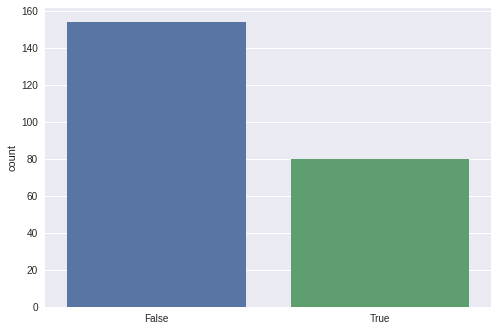

In [97]:
#prediction acc 
import seaborn as sns
sns.countplot(sub_q2.actual_label==sub_q2.pred_label)

In [98]:
print("Testing Accuracy" , ((sub_q2.actual_label==sub_q2.pred_label).sum())/(len(sub_q2)))

Testing Accuracy 0.3418803418803419
